# Machine Learning with Scikit-learn
---

The core aim of the following notebook is to utilise scikit-learn as a means to showcase working examples of the supervised machine learning tasks of **classification** and **regression**. Within the opening section of this notebook, an explanation of what the domain of machine learning consists of will take place. Following from this an overview of the the scikit-learn python library will be provided.

---

### Machine Learning

Machine learning is regarded as a set of methods that contain the capacity to detect patterns in data and these methods then utilise such patterns to make future predictions (Garreta & Moncecchi, 2013; Hackeling, 2017; Jolly, 2018). Examples of machine learning in practice are that of predicting the weather, house prices, or detecting whether an email is spam or not. This notebook will place its emphasis on the machine learning category of supervised learning. Supervised learning is implemented when the data that we are analysing contains labels or a target variable that is numeric.

# An overview of the scikit-learn Python library

Scikit-learn is regarded as a simple and efficient tool that one can utilise for predictive data analysis (Scikit-learn, 2022). The software is built entirely using Python and utilises some of the most popular libraries that Python has to offer, namely NumPy and SciPy (Jolly, 2018). It is a free and open-source software with algorithms embedded that assist one with the execution of supervised and unsupervised machine learning problems (Jolly, 2018). Scikit-learn can execute the following tasks: classification, regression, dimensionality reduction, and clustering. It also has modules for pre-processing data, extracting features, optimizing hyperparameters, and evaluating models (Hackeling, 2017).

### Scikit-learn Common Procedures

**When conducting supervised learning tasks the following steps are generally implemented.**

- Read in the dataset
    - *Exploratory data analysis (EDA)*
    - *pre-process the data (Ensure that the dataset matches the **requirements** of scikit-learn)*
- Import the required libraries and modules
- Instantiate the algorithm
- Split the data into training and test sets
    - *Fit the model on the training set*
    - *Predict on the test set*
- Evaluate the performance of the model

# Supervised Learning: Regression

Regression is the prediction of the values of one more or **continous** response variables from one or more features (Hackeling, 2017). An example of this being that of predicting the length of a salmon as a function of its age and weight.

### Importing the required libraries and modules

In [1]:
#For ease of legibility not all modules will be imported here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing our dataset for regression
from sklearn.datasets import load_diabetes

### Parameters for enhancing the legibility of data visualisation i.e., graphs

In [2]:
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,5),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 15}
plt.rcParams.update(params)

## Exploratory Data Analysis (EDA)

In [3]:
#Loading in the diabetes dataset as a pandas dataframe
#Scikit-learn has some datasets that are embedded within
data_d = load_diabetes(as_frame = True)

### Dataset description

We can get an overview of the dataset by using the **'DESCR'** command, this informs us of the number of variables measured within the dataset i.e., the rows and columns within our pandas dataframe.

In [4]:
print(data_d['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [5]:
#Viewing the initial 5 rows of data
#As stated within the description, all columns bar the target variable are numeric predictive values
data_d.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Dataset correlation

Using a heatmap we can map out the relationship between each of the variables.

In [6]:
diabetes_correlation = data_d.frame.corr(method='pearson')

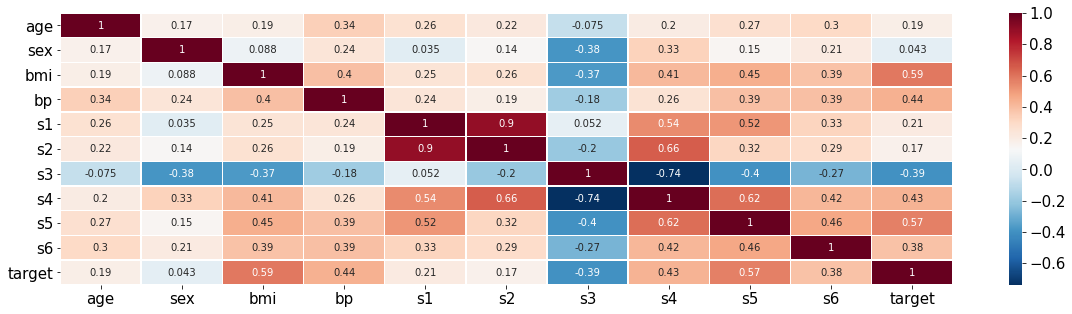

In [7]:
sns.heatmap(diabetes_correlation, xticklabels=diabetes_correlation.columns, yticklabels=diabetes_correlation.columns, cmap='RdBu_r', annot=True, linewidth=0.5);

**The heatmap has informed us of the following:**
- There is a strong positive correlation between s1(T-Cells) & s2(low-density lipoproteins)

With reference to ones diabetes progression (*the target variable*):
- A positive correlation was observed for the variables of **bmi** (body mass index) & **s5**(lamotrigine)



### Depicting the observed correlation

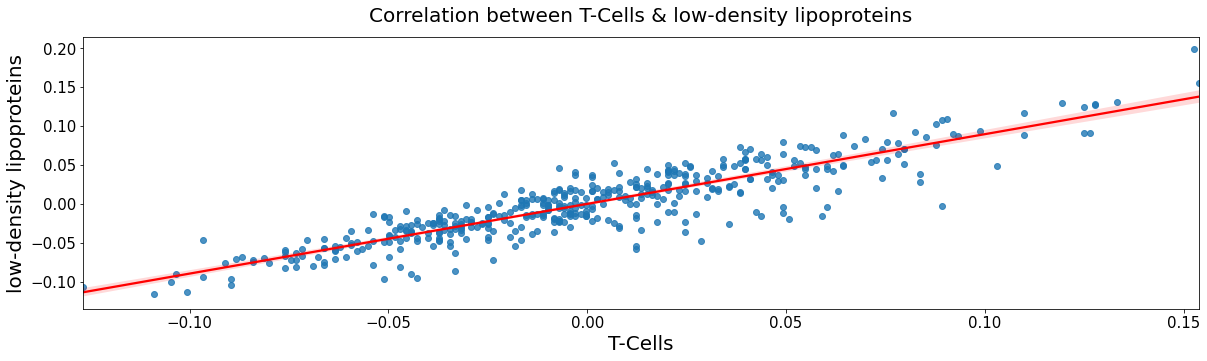

In [8]:
sns.regplot(x='s1', y='s2', data=data_d.frame, line_kws={'color':'red'})
#axis labels
plt.xlabel('T-Cells')
plt.ylabel('low-density lipoproteins')
plt.title('Correlation between T-Cells & low-density lipoproteins');

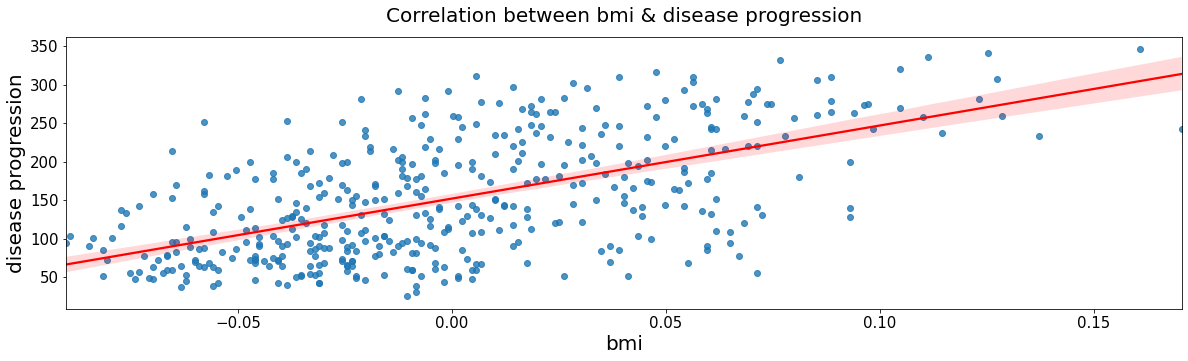

In [9]:
sns.regplot(x='bmi', y='target', data=data_d.frame, line_kws={'color':'red'})
#axis labels
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.title('Correlation between bmi & disease progression');

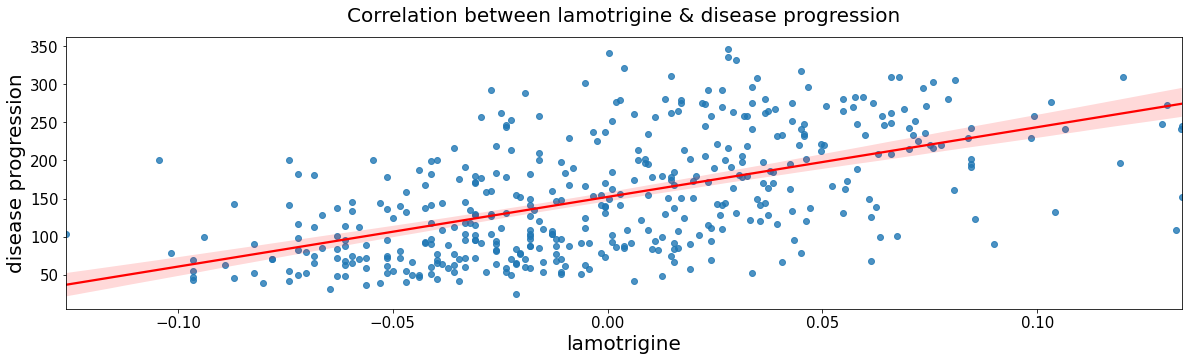

In [10]:
sns.regplot(x='s5', y='target', data=data_d.frame, line_kws={'color':'red'});
#axis labels
plt.xlabel('lamotrigine')
plt.ylabel('disease progression')
plt.title('Correlation between lamotrigine & disease progression');

## Linear regression in two dimensions

In [11]:
# Creating the feature and target variables
feature = data_d.frame['bmi'].values
target = data_d.frame['target'].values

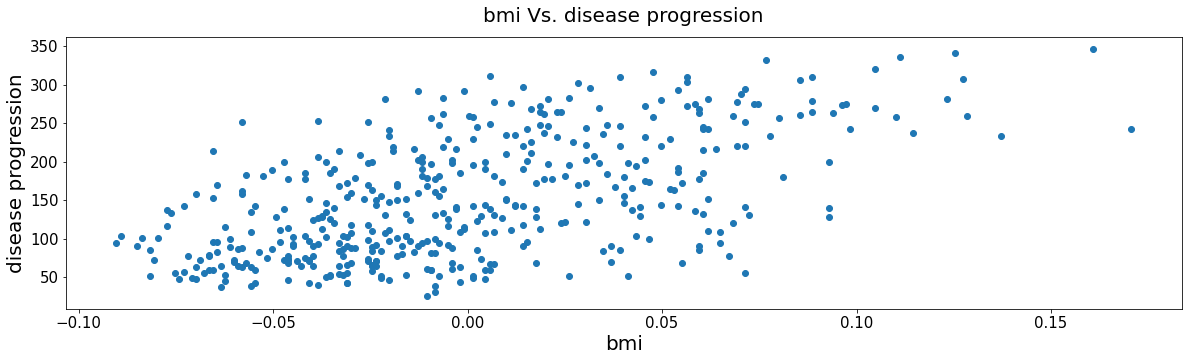

In [12]:
# Plotting the values of the feature and target variabels i.e., bmi and disease progression
plt.scatter(feature, target)
#axis labels
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.title('bmi Vs. disease progression');
plt.show()



### Utilising scikit-learn in order to conduct linear regression

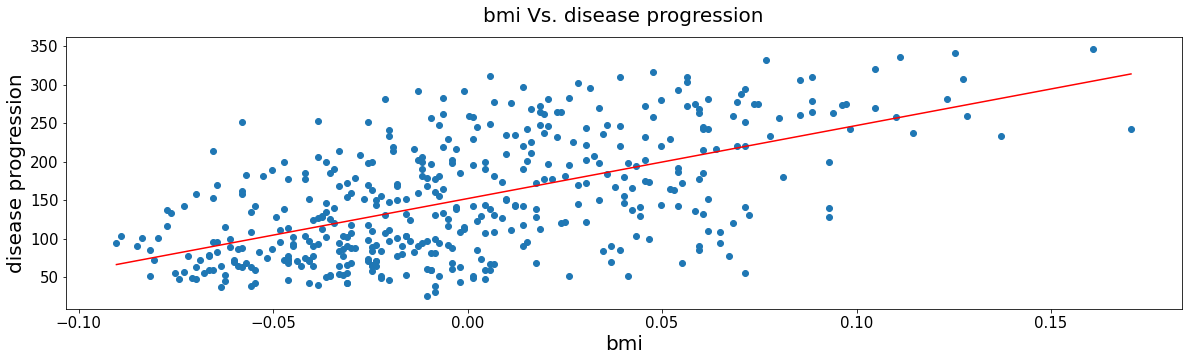

In [13]:
#Importing required the required module
from sklearn import linear_model

#Initialising a linear regression model
linear_reg = linear_model.LinearRegression()

#Reshaping the array since we only have a single feature
feature = feature.reshape(-1,1)
target = target.reshape(-1,1)

#fitting the model on the data
linear_reg.fit(feature, target)

#Define the limits of the x axis
x_lim = np.linspace(min(feature), max(feature)).reshape(-1,1)

#Scatter plot
plt.scatter(feature, target)

#Prediction line
plt.plot(x_lim, linear_reg.predict(x_lim), color='red')

#axis labels
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.title('bmi Vs. disease progression')

plt.show()

## Linear regression to predict the progression of diabetes

### Predicting disease progression while taking into consideration all measured variables.

In [14]:
# Creating the features and target variables
# the features variable contains all measured variables bar disease progression i.e., the target variable
features = data_d.frame.drop('target', axis=1)
target = data_d.frame['target'].values

#### Splitting our dataset into training and test sets 

70% of the data is used for training the model, while 30% is used for testing.

In [15]:
#Importing the required module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [16]:
#Initializing a linear regression model
linear_reg = linear_model.LinearRegression()

#Fitting the model on the data
L_reg = linear_reg.fit(X_train, y_train)

# predictions
y_test_pred = L_reg.predict(X_test)

#Accuracy of the model
linear_reg.score(X_test, y_test)

0.47729201741573335

### Plotting the test set

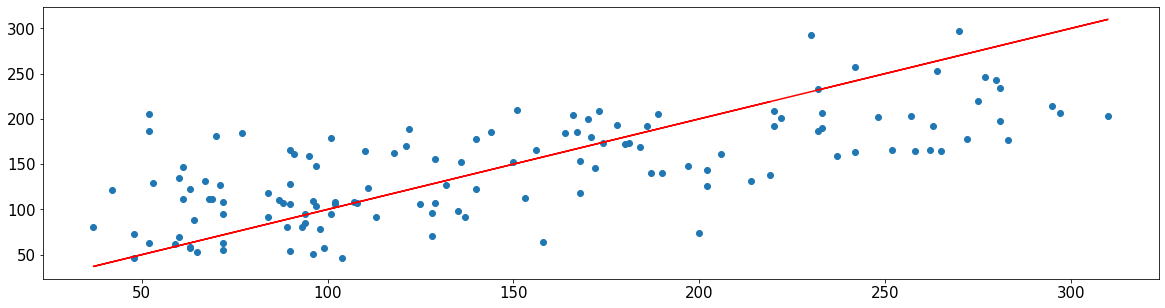

In [17]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='red');

## Model optimisation

### Ridge regression


In [18]:
#Importing required module
from sklearn.linear_model import Ridge

# Reading in the dataset 
#data_d = load_diabetes(as_frame = True)

# Creating the features and target variables
features = data_d.frame.drop('target', axis=1)
target = data_d.frame['target'].values

#Splitting our dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

#Initialize a ridge regression model
ridge_reg = Ridge(alpha = 0, normalize = True)

#Fit the model to the training data 
ridge_reg.fit(X_train, y_train)

#Extract the score from the test data
ridge_reg.score(X_test, y_test)

0.477292017415733

Our attempt to penalise hyper-optimised coefficients did not provide fruitful as no improvement in the accurary score of our model occured.

### Optimizing alpha using GridSearchCV

In [19]:
#Importing required module
from sklearn.model_selection import GridSearchCV

#Building the model  
ridge_regression = Ridge()

#Using GridSearchCV to search for the best parameter
grid = GridSearchCV(ridge_regression, {'alpha':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter
print("The most optimal value of alpha is:", grid.best_params_)



The most optimal value of alpha is: {'alpha': 0.001}


In [20]:
#Initializing an ridge regression object
ridge_regression = Ridge(alpha = 0.001)

#Fitting the model to the training and test sets
ridge_regression.fit(X_train, y_train)

#Accuracy score of the ridge regression model
ridge_regression.score(X_test, y_test)

0.47750247072276675

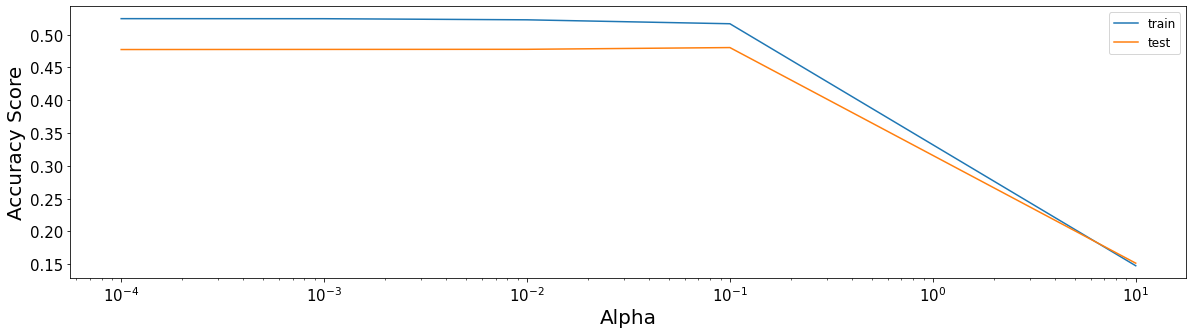

In [21]:
#Store train/test errors within an a list
train_errors = []
test_errors = []

#List with varying alpha values
alpha_list = [0.0001, 0.001, 0.01, 0.1, 10]

# Evaluate the training and test classification errors for each value of alpha
for value in alpha_list:
    
    # Create Ridge object and fit
    ridge_regression = Ridge(alpha= value)
    ridge_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(ridge_regression.score(X_train, y_train) )
    test_errors.append(ridge_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')
plt.show()

---

# Supervised Learning: Classification

Classification is the prediction of **discrete** values for one or more response variables from one or more features (Hackeling, 2017). An example of this being that of classifying houses into expensive or affordable categories based on their price, area, bedrooms etc.,

### Importing the required libraries and modules

In [22]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

#Importing our dataset for classification
from sklearn.datasets import load_wine

### Parameters for enhancing the legibility of data visualisation i.e., graphs

In [23]:
# size=20
# params = {'legend.fontsize': 'large',
#           'figure.figsize': (20,5),
#           'axes.labelsize': size,
#           'axes.titlesize': size,
#           'xtick.labelsize': size*0.75,
#           'ytick.labelsize': size*0.75,
#           'axes.titlepad': 15}
# plt.rcParams.update(params)

In [24]:
# Return to default seaborn theme
# sns.set_theme()

#Setting the style of the seaborn graphs
sns.set_style("whitegrid")
sns.set_palette("Set1")

## Exploratory Data Analysis

In [25]:
#Loading in our dataset as a pandas dataframe
data = load_wine(as_frame=True)

### Dataset description

We can get an overview of the dataset by using the **'DESCR'** command, this informs us of the number of variables measured within the dataset i.e., the rows and columns within our pandas dataframe.

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are **thirteen** different
measurements taken for different constituents found in the **three types of wine**.

In [26]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [27]:
#Viewing the initial 5 rows of data
data.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [28]:
data.data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### A Brief overview regarding the target variable of the different types of wine

#### How the names of the different wines are defined

In [29]:
category = data.target_names
for i in category:
    print(i)

class_0
class_1
class_2


#### The number of instances of each type of wine

In [30]:
wine_category_count = data.frame['target'].value_counts()
wine_category_count

1    71
0    59
2    48
Name: target, dtype: int64

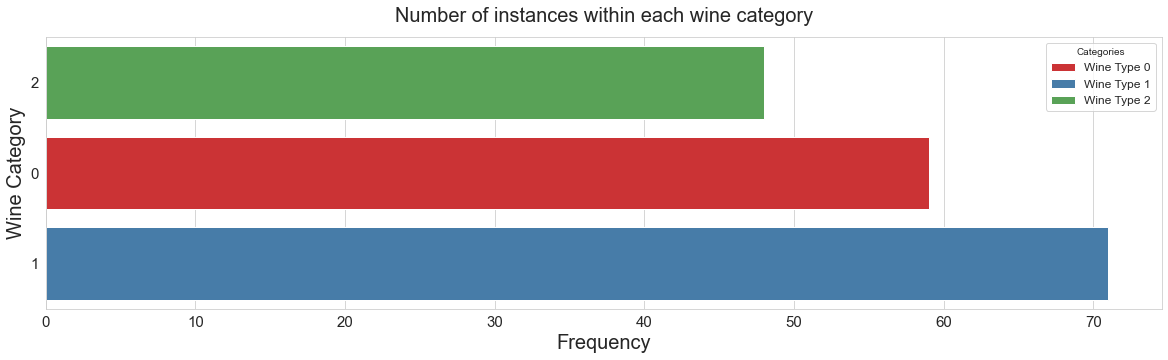

In [31]:
frequency_map = sns.countplot(y="target",
                              order = data.frame["target"].value_counts(ascending=True).index, 
                              hue="target", 
                              dodge=False, 
                              data=data.frame,
                             )

frequency_map.set(title="Number of instances within each wine category", 
                         xlabel = "Frequency", 
                         ylabel = "Wine Category")

plt.legend(["Wine Type 0","Wine Type 1", "Wine Type 2"],title = "Categories")
plt.show()



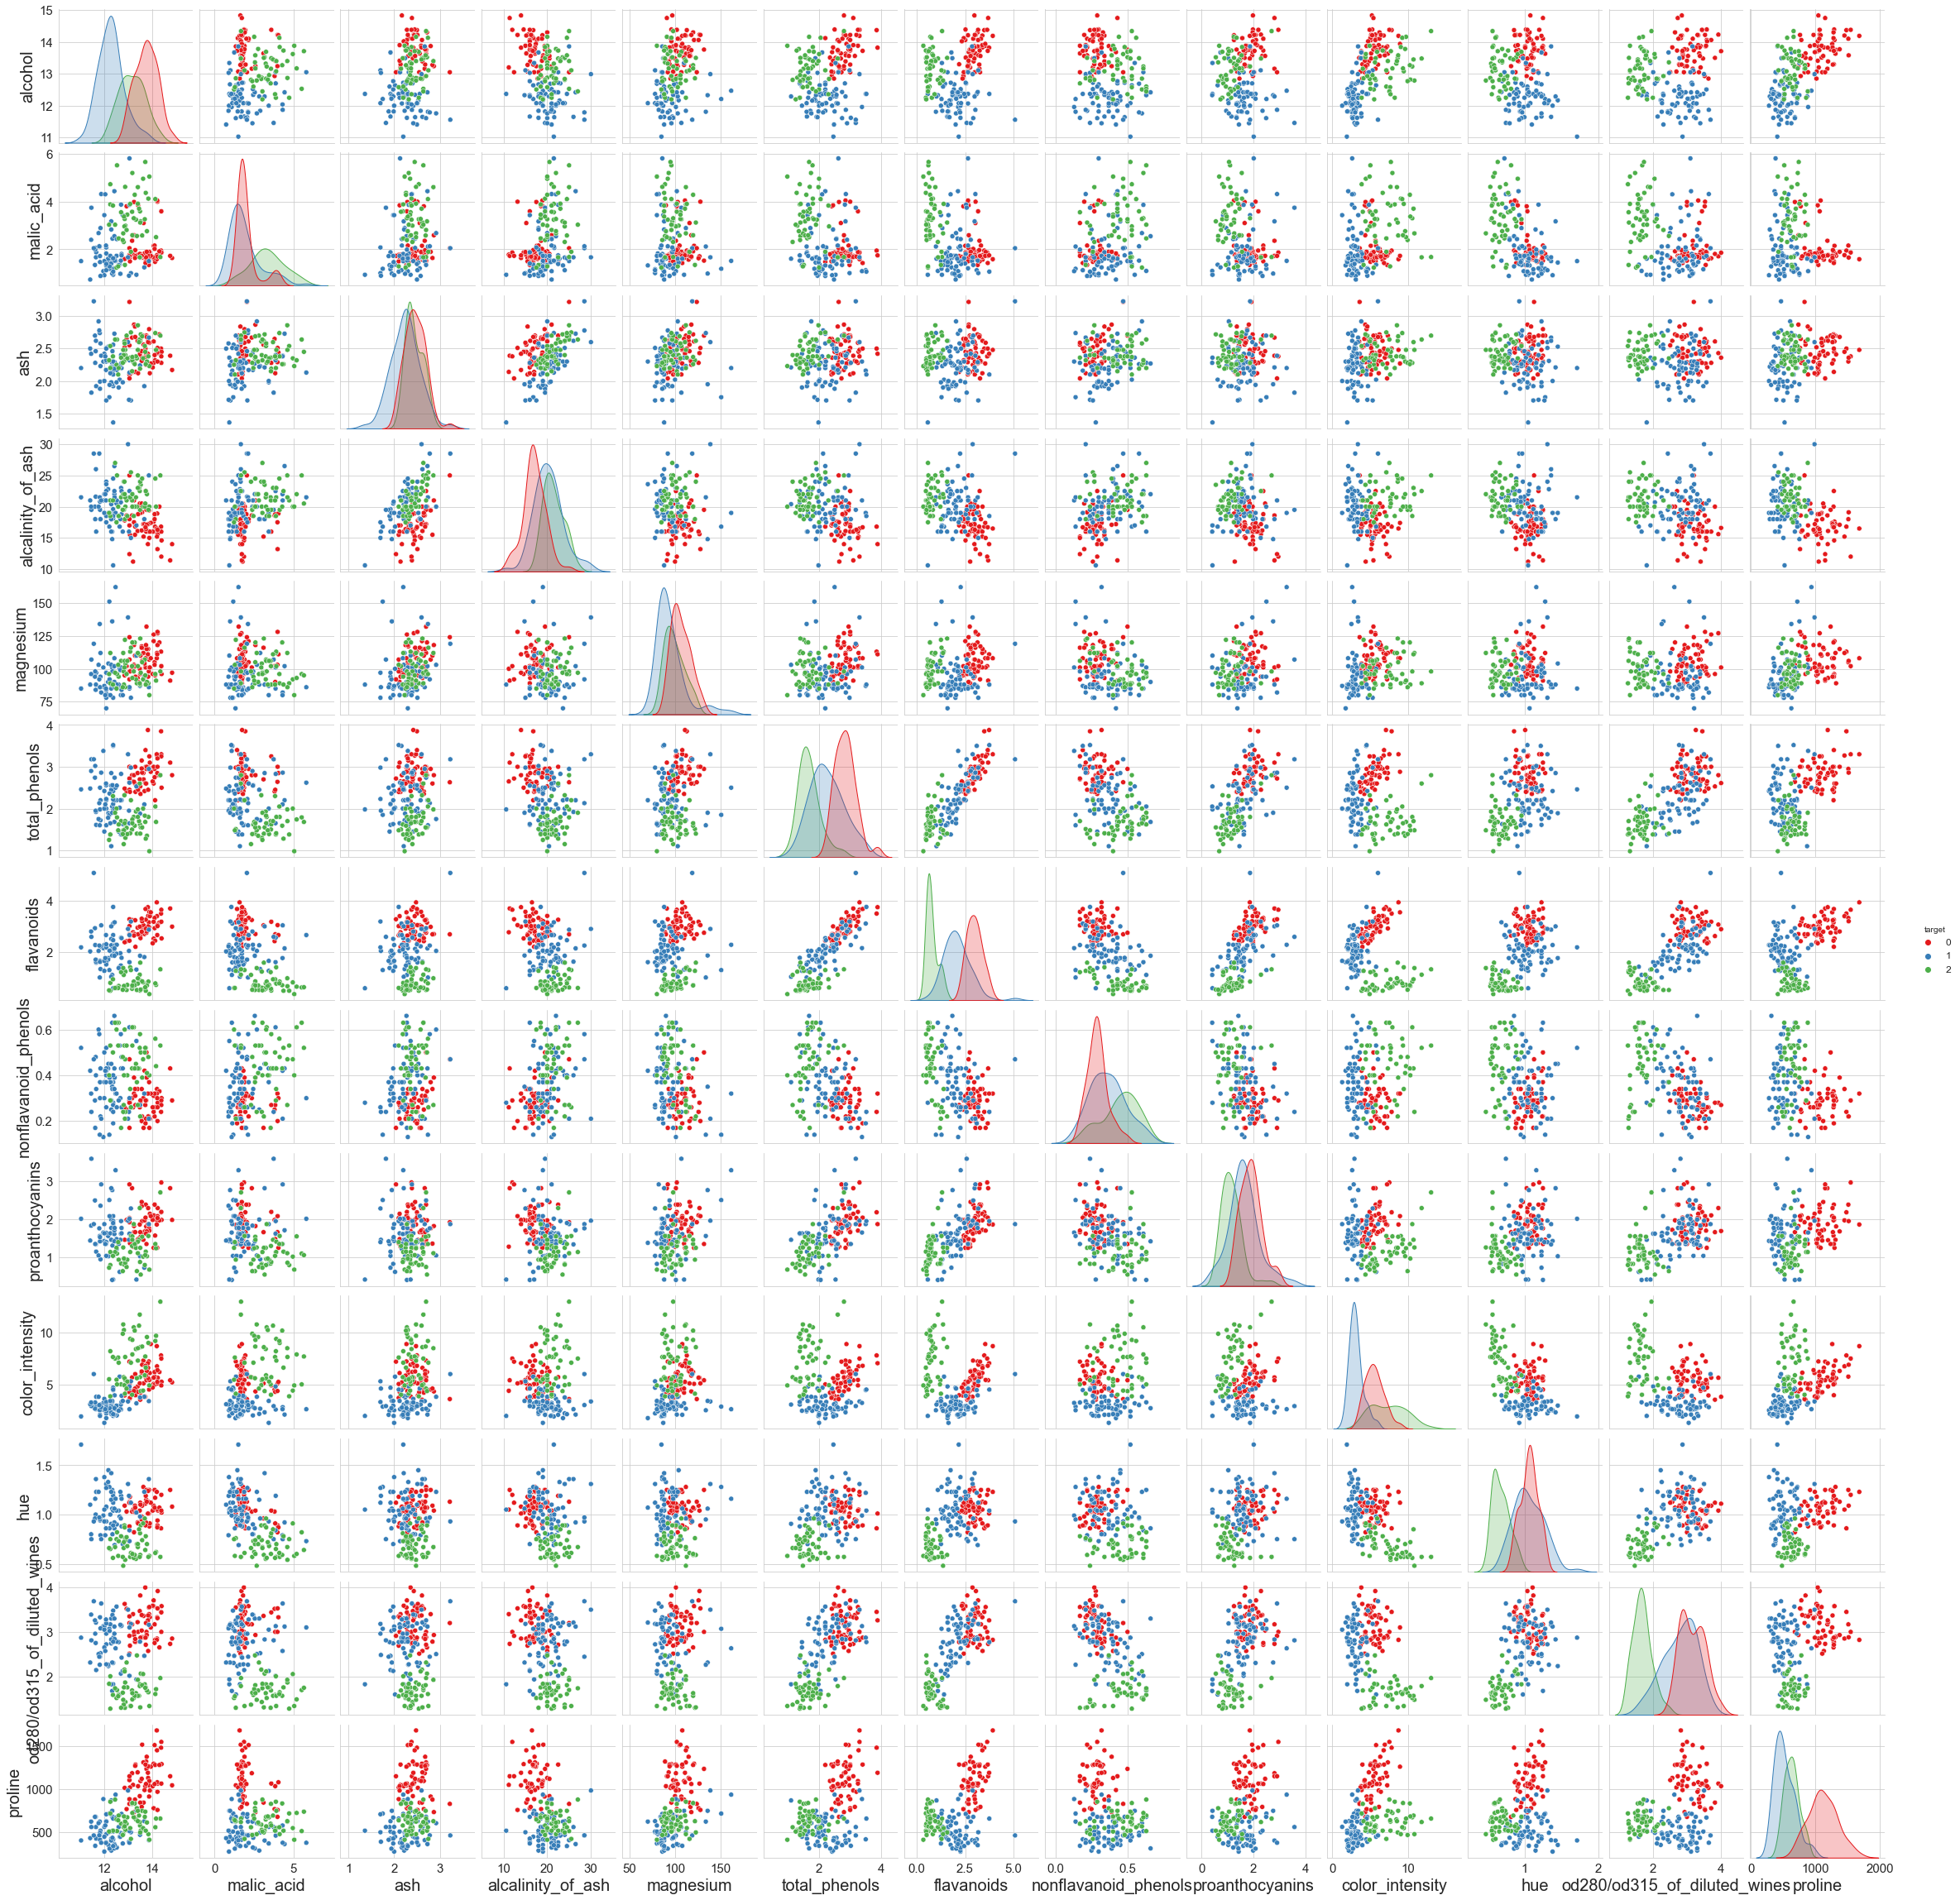

In [32]:
# Please note this command may take a minute to execute due to the number of variables within the dataset.

sns.pairplot(data.frame, hue='target', palette="Set1")
plt.show();

### The average of each variable sorted by wine type

In [33]:
wine_category_sort = data.frame.groupby("target")
wine_category_sort.mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


The pairplot & the average table plotted above inform us that the variables of **alcohol**, **flavanoids**, **color intensity** and **proline** are most informative regarding how we could potientially distinguish between the different types of wine. It may be suggested that we can propose what category a wine belongs to based on these variables. As each type of wine may have a distinct amount of each variable.

### Kernel density estimate plots of the four key variables specified above (*alcohol, flavanoids, color intensity & proline*)

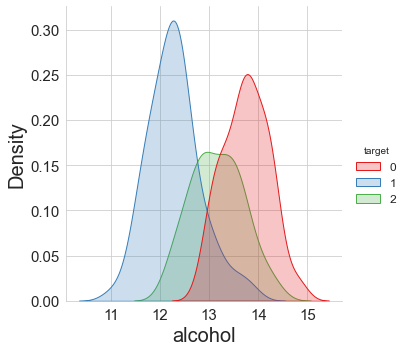

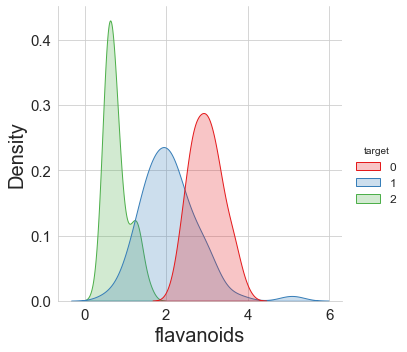

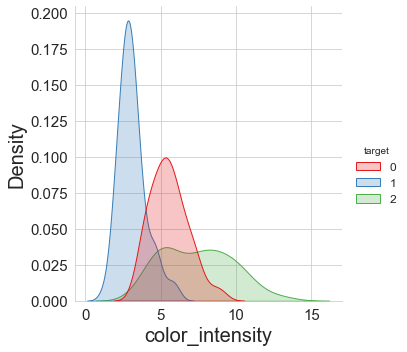

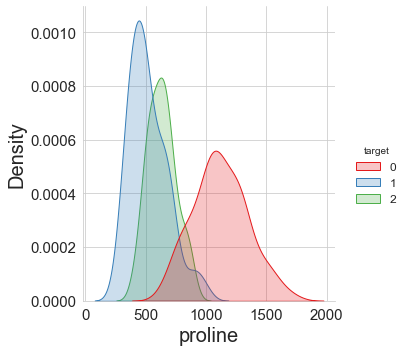

In [34]:
sns.displot(data=data.frame, x=data.frame['alcohol'], hue="target", kind='kde', fill=True, palette="Set1");

sns.displot(data=data.frame, x=data.frame['flavanoids'], hue="target", kind='kde', fill=True, palette="Set1");

sns.displot(data=data.frame, x=data.frame['color_intensity'], hue="target", kind='kde', fill=True, palette="Set1");

sns.displot(data=data.frame, x=data.frame['proline'], hue="target", kind='kde', fill=True, palette="Set1");

#### Average table of these four variables

In [35]:
info_table = data.frame[['alcohol', 'flavanoids', 'color_intensity',  'proline','target']]
info_table

sub_info = info_table.groupby('target')
sub_info.mean()

,alcohol,flavanoids,color_intensity,proline
target,,,,
0,13.744746,2.982373,5.528305,1115.711864
1,12.278732,2.080845,3.086620,519.507042
2,13.153750,0.781458,7.396250,629.895833


### Dataset Correlation 

Using a heatmap we can map out the relationship between each of the variables.

In [36]:
correlation = data.data.corr(method = 'pearson')

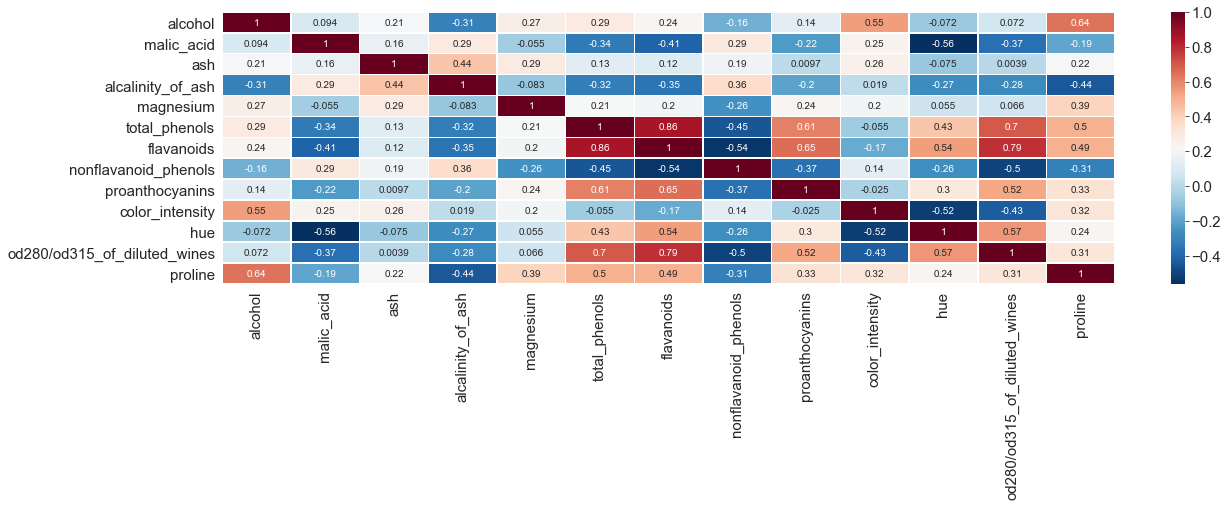

In [37]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='RdBu_r', annot=True, linewidth=0.5);

# Predicting Categories using the K-Nearest Neighbors algorithm

### Splitting the data into training and test sets

In [38]:
# Creating the features and target variables
features = data.frame.drop('target', axis =1).values
target = data.frame['target'].values

70% of the data is used for training the model, while 30% is used for testing.

In [39]:
# Importing the required module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify=target)

### Implementation and evaluation of the model

In [40]:
# Import k-nearest neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialising the KNN classifier with 3 neighbors
# The number of neighbors is chosen arbitrarily
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Extracting the accuracy score from the test sets
knn_classifier.score(X_test, y_test)

0.6851851851851852

## Fine-tuning the parameters of the K-NN algorithm

### Using GridSearchCV (algorithm) to find the optimal number of neighbors

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
#Initializing a grid with possible number of neighbors from 1 to 24
grid = {'n_neighbors' : np.arange(1, 25)}

#Initializing a k-NN classifier 
knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors 
knn = GridSearchCV(knn_classifier, grid, cv = 10)

# Fitting the classifier on the training data
knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [43]:
#Extracting the optimal number of neighbors 
knn.best_params_

{'n_neighbors': 23}

In [44]:
#Extracting the accuracy score for optimal number of neighbors
knn.best_score_

0.7397435897435898

### Scaling for optimized performance

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [46]:
# Setting up the scaling pipeline
pipeline_order = [('scaler', StandardScaler()),
                  ('knn', KNeighborsClassifier(n_neighbors = 23))]

pipeline = Pipeline(pipeline_order)

#Fitting the classifier to the scaled dataset
knn_classifier_scaled = pipeline.fit(X_train, y_train)

#Extracting the score
knn_classifier_scaled.score(X_test, y_test)

0.9814814814814815

---

**Our attempts to further optimize the performance of the model proved fruitful**
- Our initial accuracy score of **0.685** was increase to that of **0.739** through the process of finding the models *optimal number of neighbors* for this particular dataset.
- Through the process of establishing a *pipeline and scaling the data* the accuracy score of **0.739** increased to **0.981**

---

# References

---

Garreta, R. and Moncecchi, G. (2013) Learning Scikit-learn : Machine Learning in Python: Experience the Benefits of Machine Learning Techniques by Applying Them to Real-world Problems Using Python and the Open Source Scikit-learn Library. Birmingham, UK: Packt Publishing (Community Experience Distilled). Available at: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=673033&site=ehost-live&scope=site (Accessed: 26 July 2022).

Hackeling, G. (2017) Mastering Machine Learning with Scikit-learn - Second Edition. Birmingham, UK: Packt Publishing. Available at: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=1562686&site=ehost-live&scope=site (Accessed: 26 July 2022).

Kevin Jolly (2018) Machine Learning with Scikit-learn Quick Start Guide : Classification, Regression, and Clustering Techniques in Python. Birmingham, UK: Packt Publishing. Available at: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=1936459&site=ehost-live&scope=site (Accessed: 23 July 2022).

Scikit-learn (2022), Getting started, Available at: https://scikit-learn.org/stable/getting_started.html (Accessed: 26 July 2022).  

Scikit-learn (2022), User guide, Available at: https://scikit-learn.org/stable/user_guide.html (Accessed: 26 July 2022).  

Scikit-learn (2022), tutorial, Available at: https://scikit-learn.org/stable/tutorial/index.html (Accessed: 26 July 2022).